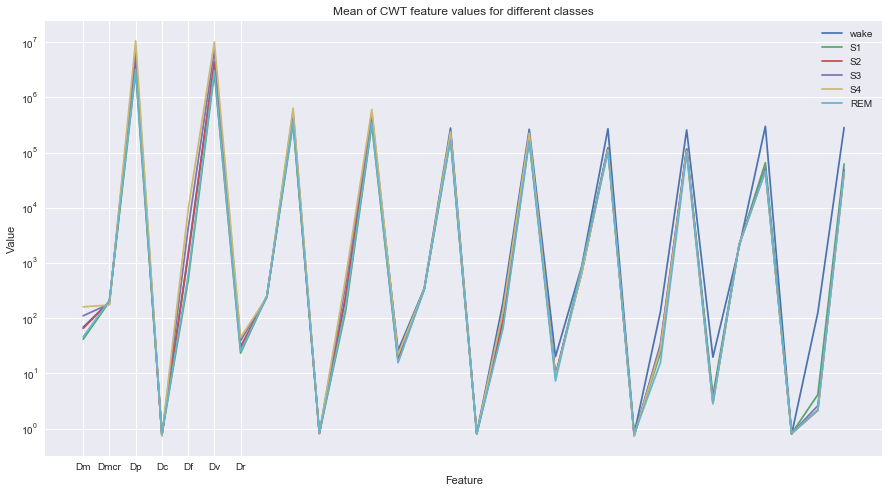

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


features = pd.read_csv('G:/EEG Project/Hut lab data/10_sec_epochs/cwt_spectral features/Oz-C3/output.csv',index_col=0)
features = features[features.scores != 6]
features = features[~np.isnan(features['Df'])]   #H_complexity, AR_7, Gr
class_1 = features[features.scores == 0].loc[:, features.columns != 'scores']
class_2 = features[features.scores == 1].loc[:, features.columns != 'scores']
class_3 = features[features.scores == 2].loc[:, features.columns != 'scores']
class_4 = features[features.scores == 3].loc[:, features.columns != 'scores']
class_5 = features[features.scores == 4].loc[:, features.columns != 'scores']
class_6 = features[features.scores == 5].loc[:, features.columns != 'scores']

class_1 = class_1.median()
class_2 = class_2.median()
class_3 = class_3.median()
class_4 = class_4.median()
class_5 = class_5.median()
class_6 = class_6.median()


labels = ['Dm', 'Dmcr', 'Dp',  'Df' ,'Dv', 'Dr',\
         'Tm', 'Tmcr', 'Tp', 'Tf' ,'Tv', 'Tr',\
         'Am', 'Amcr', 'Ap', 'Af' ,'Av', 'Ar',\
         'Bm', 'Bmcr', 'Bp', 'Bf' ,'Bv', 'Br',\
         'Gm', 'Gmcr', 'Gp', 'Gf' ,'Gv', 'Gr']

plt.figure(figsize=(15, 8))
plt.rcParams.update({'font.size': 18})

class_1.plot(label='wake', use_index=True, sharex=True, logy=True)
class_2.plot(label='S1', use_index=True, sharex=True, logy=True)
class_3.plot(label='S2', use_index=True, sharex=True, logy=True)
class_4.plot(label='S3', use_index=True, sharex=True, logy=True)
class_5.plot(label='S4', use_index=True, sharex=True, logy=True)
class_6.plot(label='REM', use_index=True, sharex=True, logy=True)
plt.legend()
plt.xticks(np.arange(7), labels)
plt.title('Mean of CWT feature values for different classes')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.savefig('Median_cwt_features.png')
plt.show()

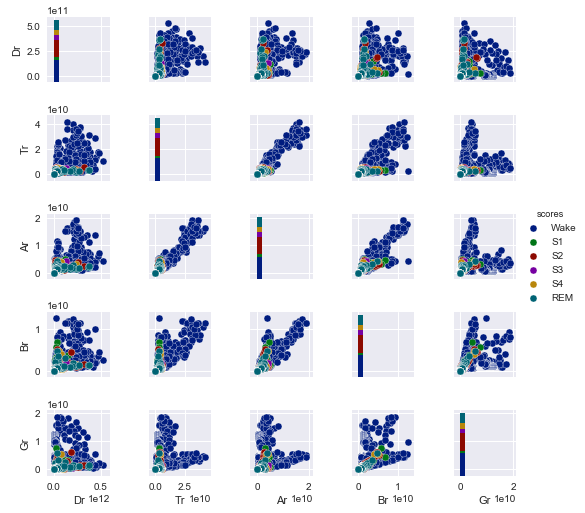

In [23]:
import seaborn as sns; sns.set()
features['scores'].replace(0, 'Wake', inplace=True)
features['scores'].replace(1, 'S1', inplace=True)
features['scores'].replace(2, 'S2', inplace=True)
features['scores'].replace(3, 'S3', inplace=True)
features['scores'].replace(4, 'S4', inplace=True)
features['scores'].replace(5, 'REM', inplace=True)
plt.figure()
plt.rcParams.update({'font.size': 22})

sns_pair = sns.pairplot(features[['Dr', 'Tr', 'Ar', 'Br', 'Gr', 'scores']], hue='scores', size=1.5, palette="dark")
sns_pair.savefig('cwt_r_features_pairplot.png')